In [1]:
CLR = {
    'blue': ['#e0f3ff', '#aadeff', '#2bb1ff', '#15587f', '#0b2c40'],
    'gold': ['#fff3dc', '#ffebc7', '#ffddab', '#b59d79', '#5C4938'],
    'red':  ['#ffd8e8', '#ff9db6', '#ff3e72', '#6B404C', '#521424'],
    'gray': ['#eeeeee', '#bbbbbb', '#999999', '#666666', '#333333'],
}

In [2]:
import pickle
import pathlib

from matplotlib import pyplot as plt

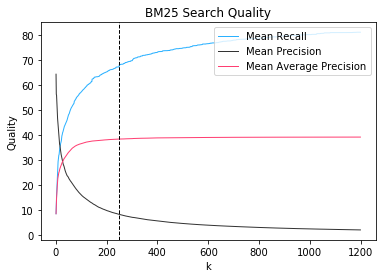

saving to opt/elastic-find-k-global.png
saving to opt/elastic-find-k-global.svg

VNGOL EXPERIMENT

----------------------  -----
mean precision           1.35
mean recall             83.59
mean average precision  39.25
----------------------  -----

------------------------------------------------------------

topic       k    POS    TP    FP    FN    P    R    AP
-------  ----  -----  ----  ----  ----  ---  ---  ----
161-AH   2000      1     1  1999     0    0  100   100
172-AH   2000      1     1  1999     0    0  100   100
194-AH   2000      2     2  1998     0    0  100   100
176-AH   2000     74    74  1926     0    3  100    98
173-AH   2000     10    10  1990     0    0  100    96
141-AH   2000      8     8  1992     0    0  100    94
196-AH   2000      6     6  1994     0    0  100    94
142-AH   2000     65    65  1935     0    3  100    91
189-AH   2000      6     6  1994     0    0  100    85
199-AH   2000     48    48  1952     0    2  100    78
185-AH   2000      7     7  

In [5]:
base_dir = pathlib.Path('../opt/bak')
out_dir = pathlib.Path('opt/')

def plot_global_k(fname: str, save: bool = False):
    with open(fname, 'rb') as fd:
        exp = pickle.load(fd)
    
    def fig_before(title: str, xlabel, ylabel):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        return fig, ax
    
    def fig_after(fig, ax, fname=None):
        if display:
            plt.show(fig)
        if fname:
            for out_file in [str(out_dir/fname) + s for s in ('.png', '.svg')]:
                print('saving to', out_file)
                fig.savefig(out_file)

        fig.clear()
        plt.close(fig)
    
    fig, ax = fig_before('BM25 Search Quality', 'k', 'Quality')
    
    def plot(arr, color, label):
        ax.plot(range(1, len(arr)), arr[1:], lw=1, color=color, label=label)
    
    end = 1200
    plot(exp.arr_mean_recall[:end] * 100, CLR['blue'][2], 'Mean Recall')
    plot(exp.arr_mean_precision[:end] * 100, CLR['gray'][4], 'Mean Precision')
    plot(exp.arr_mean_avg_precision[:end] * 100, CLR['red'][2], 'Mean Average Precision')
    
    ax.axvline(x=250, color='black', ls='dashed', lw=1)
    ax.legend(loc='upper right')
    
    fig_after(fig, ax, 'elastic-find-k-global')
    print(str(exp))
    print(exp.arr_mean_avg_precision[250])

plot_global_k(str(base_dir / 'elastic_find_k-global.pickle'))

In [10]:
import numpy as np
a = np.array([9.335, 7.134, 5.561, 4.674, 4.361, 3.290, 0.305, 0.033])
print(a.sum())
print(a / a.sum())

34.693
[0.26907445 0.20563226 0.1602917  0.13472458 0.12570259 0.09483181
 0.0087914  0.0009512 ]
